# **Project Name**    -  Customer Segmentation Using RFM Analysis and  Clustering



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Name -**          - Janit Berwal



# **Project Summary -**

In this project, we performed customer segmentation using clustering techniques to group customers based on their Recency, Frequency, and Monetary (RFM) values. These features help identify how recently a customer purchased, how often they buy, and how much they spend. We first scaled the data to ensure all features had equal weight, as clustering depends on distances.

We applied K-Means clustering, which divides data into K groups by minimizing the distance within each cluster. To decide the best number of clusters (K), The "elbow point" on the graph indicated that K = 4 was optimal.

We also used Agglomerative Clustering, a hierarchical method that starts with each point as its own cluster and gradually merges the closest ones. To decide the number of clusters here, we used a Dendrogram, which visually shows how clusters are merged step-by-step. Cutting the dendrogram at a certain level again suggested 4 clusters.

To evaluate both models, we used the Silhouette Score, which tells how well-separated the clusters are. A score of around 0.59 showed that the clustering was fairly good. Both methods gave meaningful customer groups that can help improve marketing and customer retention strategies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project aims to segment customers based on their purchasing behavior using the RFM (Recency, Frequency, Monetary) model. By applying K-Means Clustering on scaled RFM data, we can group customers into meaningful clusters such as high-value, at-risk, or new customers. This segmentation helps businesses better understand their customer base and make data-driven marketing decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
data = pd.read_excel('/content/drive/MyDrive/Dataset ML/Copy of Copy of Online Retail.xlsx')

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

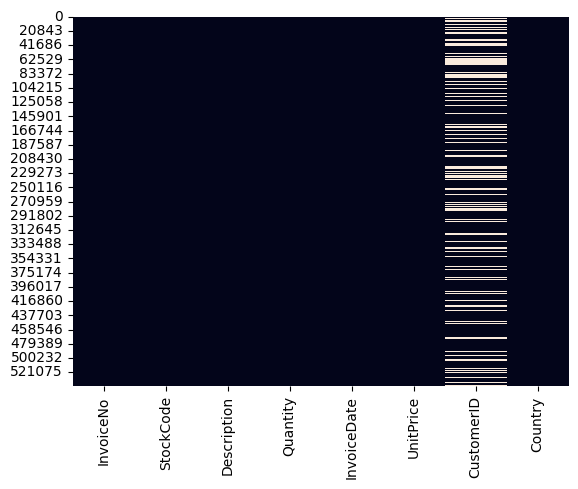

In [9]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [67]:
print(data['CustomerID'].nunique())

4372


In [12]:
# Check Unique Values for each variable.
data.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [14]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data ['InvoiceDate'].dt.month
data['Day'] = data ['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
data['Weekday']=data['InvoiceDate'].dt.day_name()


In [15]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [16]:
#Data cleaning
#Handelling the missing or null values
data.dropna(inplace=True)

Thus we removed all the rows with missing or null values as there were many rows with customer id as null and also description as null

In [17]:
data.shape  #shape after removing null values

(406829, 14)

In [18]:
# now we can see there are no null values in our dataset
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Year,0
Month,0


In [19]:
# Now we will remove all the duplicates from our dataset
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(401604, 14)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

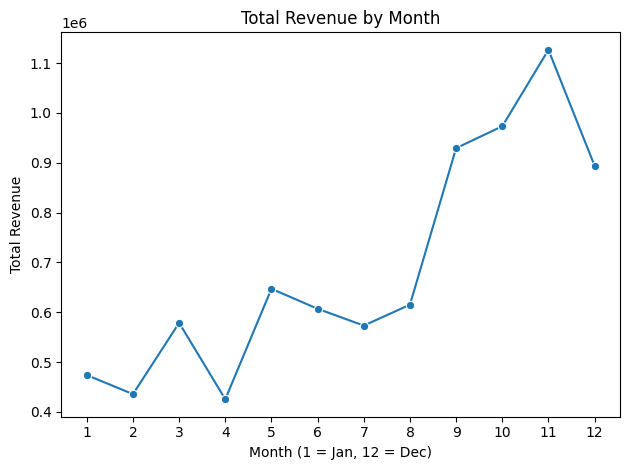

In [21]:
# Chart - 1 visualization code
monthly_sales = data.groupby('Month')['TotalPrice'].sum().reset_index()

sns.lineplot(x='Month', y='TotalPrice', data=monthly_sales, marker='o')
plt.title('Total Revenue by Month')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(1, 13))
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The line plot shows the and easily compares the revenue monthwise

##### 2. What is/are the insight(s) found from the chart?

We can see that the revenue drastically increased in last months of the year seperatelly in sept ,oct , november and the revenue is very low in starting months of the year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

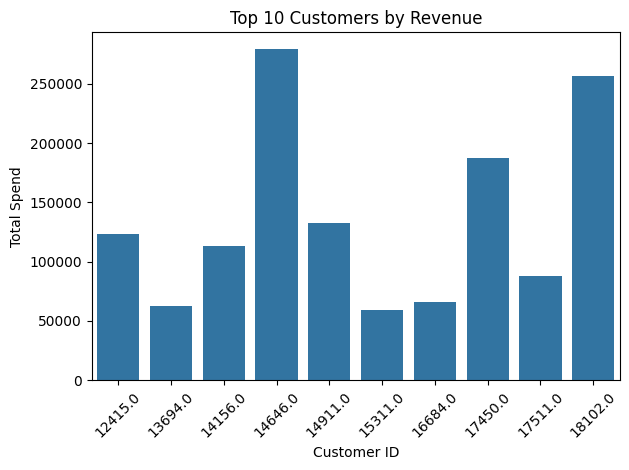

In [22]:
# Chart - 2 visualization code
top_customers = data.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).reset_index()

sns.barplot(x='CustomerID', y='TotalPrice', data=top_customers)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

This bar plot displays the top 10 customers which spend the most

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

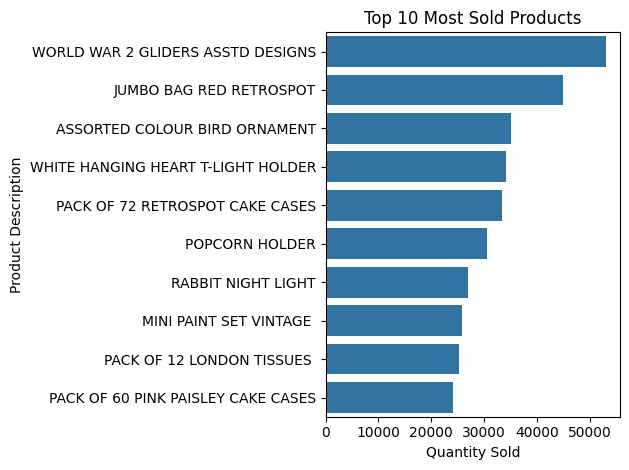

In [23]:
# Chart - 3 visualization code
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()


sns.barplot(x='Quantity', y='Description', data=top_products)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot easily compares the differnce between the products

##### 2. What is/are the insight(s) found from the chart?

The insights found is that , these are the top 10 most sold products and we should increase their demand and also launch similar products so that they can boost our sale

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

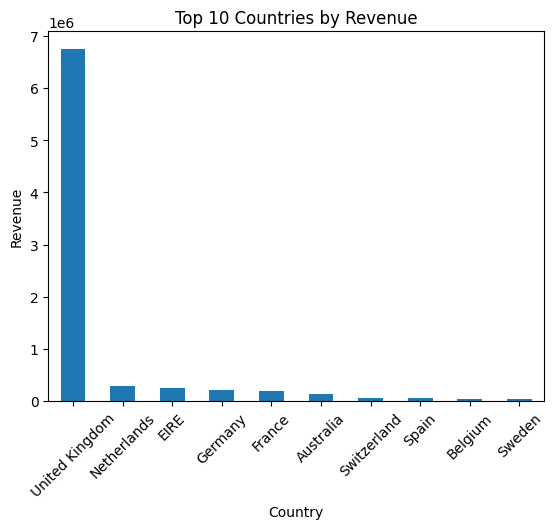

In [24]:
# Chart - 4 visualization code

country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The plot shows the top 10 countries but we can clearly see that USA is most dominating in the revenue charts as compared to others , so we should launch more products and offers while keeping USA in mind , so that it helps in increasing the revenue

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

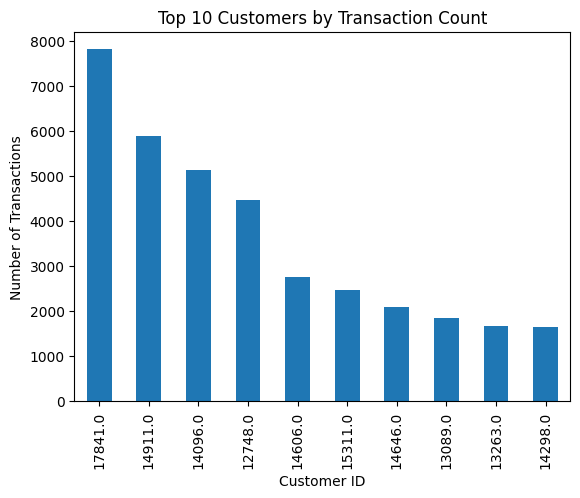

In [25]:
# Chart - 5 visualization code
cust_freq = data['CustomerID'].value_counts().head(10)

cust_freq.plot(kind='bar')
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6- Correlation Heatmap

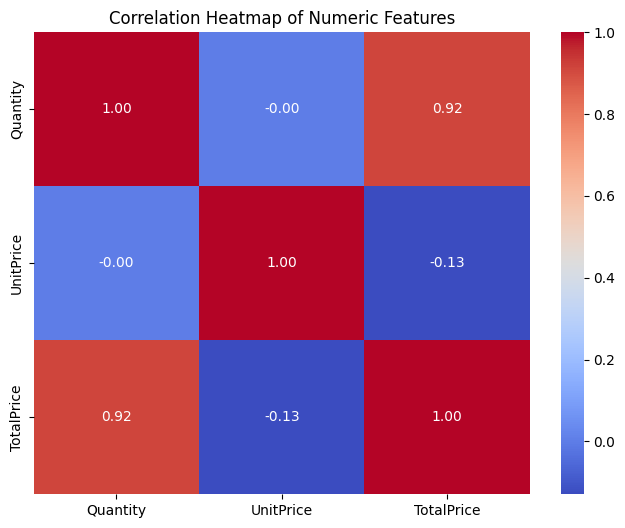

In [26]:
# Correlation Heatmap visualization code
numeric_data = data[['Quantity', 'UnitPrice', 'TotalPrice']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 7- Pair Plot

In [27]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
""" Handeled the missing values k in Data  Wrangling part"""

' Handeled the missing values k in Data  Wrangling part'

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [69]:
print("Before filtering:", data.shape)

Before filtering: (334853, 14)


In [70]:
# Handling Outliers & Outlier treatments
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['TotalPrice'] >= Q1 - 1.5 * IQR) & (data['TotalPrice'] <= Q3 + 1.5 * IQR)]

print("After filtering:", data.shape)

After filtering: (324634, 14)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction

#### 2. Lower Casing

In [35]:
# Lower Casing

#### 3. Removing Punctuations

In [36]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords

In [39]:
# Remove White spaces

#### 6. Rephrase Text

In [40]:
# Rephrase Text

#### 7. Tokenization

In [41]:
# Tokenization

#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [43]:
# POS Taging

#### 10. Text Vectorization

In [44]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [71]:
# Manipulate Features to minimize feature correlation and create new features
import datetime as dt

reference_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# grouping customer wise
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # to calc how many days before last purchase
    'InvoiceNo': 'nunique',  # to calculate the frequency of the customer
    'TotalPrice': 'sum'  # money spent by customer
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [72]:
# rfm information of first five customers
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,2028.87
1,12348.0,249,3,111.08
2,12349.0,19,1,936.76
3,12350.0,310,1,193.60
4,12352.0,36,7,1222.44


#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [73]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [74]:
rfm_scaled.shape

(4140, 3)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [51]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [53]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

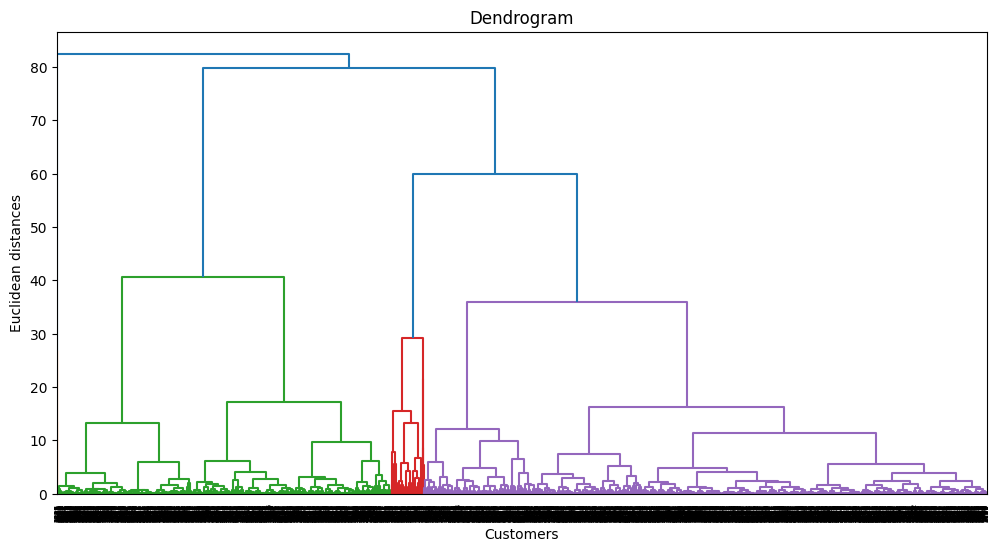

In [75]:
# ML Model - 1 Implementation
#Dendogram
import scipy.cluster.hierarchy as sch


plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

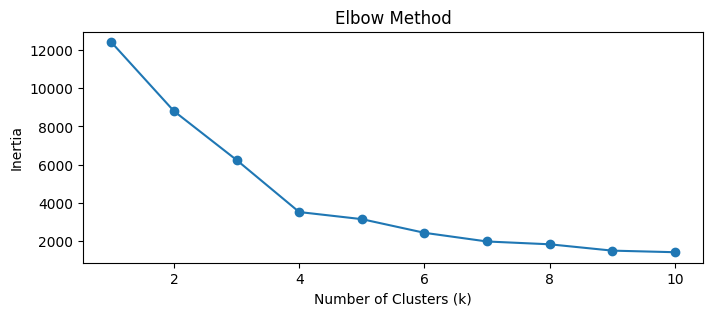

In [77]:
#Elbow method
k_range = range(1,11)
inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(rfm_scaled)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Hence from the above Elbow graph we can see that the no of optimal clusters are 4

In [78]:
kmeans = kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(rfm_scaled)


In [79]:
y_kmeans

array([1, 0, 1, ..., 1, 3, 1], dtype=int32)

In [80]:
print(y_kmeans.shape)

(4140,)


In [81]:
print("rfm_scaled shape:", rfm_scaled.shape)

rfm_scaled shape: (4140, 3)


In [82]:
from sklearn.metrics import silhouette_score

score = silhouette_score(rfm_scaled, y_kmeans)
print("Silhouette Score for k=4:", score)


Silhouette Score for k=4: 0.5700977422062476


In [83]:

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.932913794715485
Silhouette Score for k=3: 0.566174362167621
Silhouette Score for k=4: 0.5700977422062476
Silhouette Score for k=5: 0.5646131042698801
Silhouette Score for k=6: 0.48684577264659273
Silhouette Score for k=7: 0.4809332745243192
Silhouette Score for k=8: 0.46689579849008617
Silhouette Score for k=9: 0.42121722290389063
Silhouette Score for k=10: 0.4202454139376057


We found the Silhouette Score for all the clusters from 2 to 11 and we found out that the optimal no of clusters are 4 as it is 0.59 (most closest to 1) from the above clusters

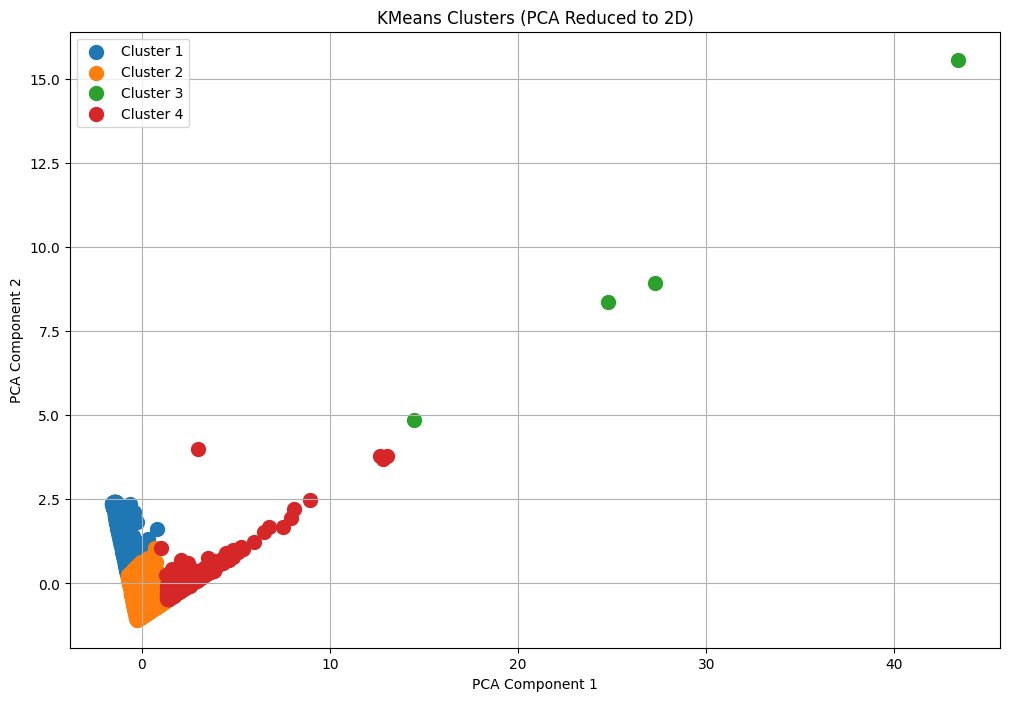

In [84]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(12, 8))
for cluster_id in range(len(set(y_kmeans))):
    plt.scatter(rfm_pca[y_kmeans == cluster_id, 0],
                rfm_pca[y_kmeans == cluster_id, 1],
                s=100,
                label=f'Cluster {cluster_id + 1}')

plt.title('KMeans Clusters (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
agglomerative = AgglomerativeClustering(n_clusters=4)
y_agglomerative = agglomerative.fit_predict(rfm_scaled)


In [89]:
y_agglomerative

array([2, 0, 2, ..., 2, 2, 2])

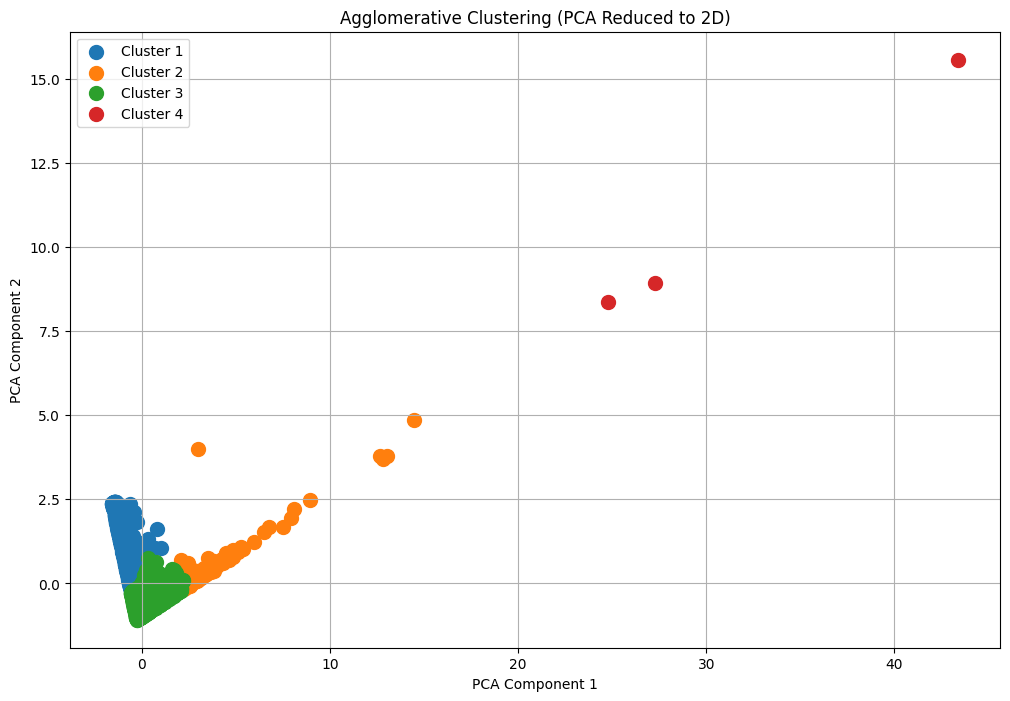

In [90]:

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(12, 8))

for cluster_id in range(len(set(y_agglomerative))):
    plt.scatter(rfm_pca[y_agglomerative== cluster_id, 0],
                rfm_pca[y_agglomerative == cluster_id, 1],
                s=100,
                label=f'Cluster {cluster_id+1}')

plt.title('Agglomerative Clustering (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

Answer Here.

# **Conclusion**

 This project focused on customer segmentation using unsupervised machine learning techniques — K-Means Clustering and Agglomerative Hierarchical Clustering — applied on cleaned data.

 =>The RFM (Recency, Frequency, Monetary) model was used to engineer meaningful features from raw customer data to better understand their purchasing behavior.

 =>The dataset was first cleaned by removing null values, especially in Customer ID, and duplicates, ensuring accurate analysis.

=>Using Elbow Method and Silhouette Score, we found the optimal number of clusters (k=4) for K-Means. This value gave a good balance between cluster separation and intra-cluster similarity.

=>For Hierarchical Clustering, a Dendrogram was plotted, helping us visually determine a similar cut-off point to form 4 clusters. This allowed us to compare clustering results between the two approaches.

=> PCA (Principal Component Analysis) was used for 2D visualization to better understand how clusters are distributed in reduced space.

=>The clustering results can now be used for targeted marketing, personalized offers, and customer retention strategies by focusing differently on each segment.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***